In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('C:\\Users\\spassiri\\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_no_cat = df[['PassengerId','Survived','Pclass','Age','SibSp','Parch']]
df_no_cat = df_no_cat[pd.isnull(df_no_cat['Age']) ==0] # 0 rows deleted

In [7]:
df_no_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 39.0 KB


In [8]:
X = df_no_cat[['PassengerId','Pclass','Age','SibSp','Parch']]
y = df_no_cat['Survived']

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [12]:
logreg.score(X_train, y_train) 

0.6953907815631263

In [13]:
logreg.score(X_test,y_test)

0.7116279069767442

### EDA

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Comments 
* we can remove column Embarked as logically it shouldn't influence the target value
* Name, PassengerID also can be removed as they can be used only for numerating the data, ticket - a random number
* cabin number also not informative number




In [15]:
data = df[['Survived','Pclass', 'Sex','Age','SibSp','Parch', 'Fare']]

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [17]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


20% of data will be lost if we just delete rows with NaN age


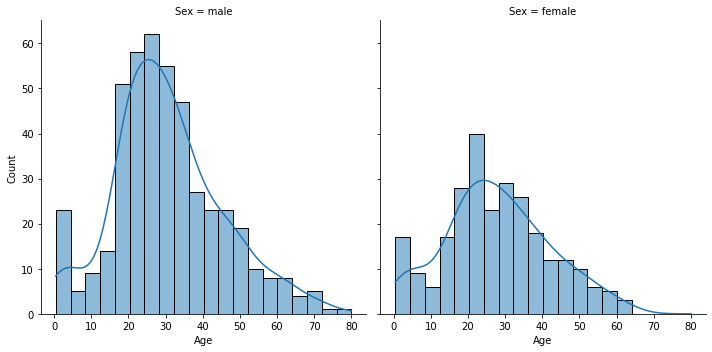

In [26]:
sns.displot(data=data, x="Age", col="Sex", kde=True)

<AxesSubplot:xlabel='Age'>

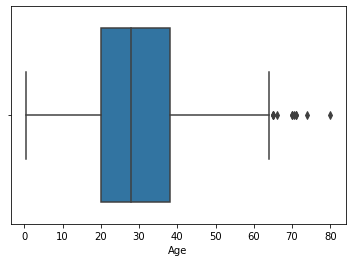

In [30]:
sns.boxplot(data=data,x = 'Age')

In [81]:
print(data['Age'][data['Sex'] == 'male'].median())
print(data['Age'][data['Sex'] == 'female'].median())

29.0
27.0


In [19]:
men = (data['Age'].isnull()) & (data['Sex'] =='male') # median for men
data.loc[men, 'Age'] = 29

C:\Users\spassiri\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
women = (data['Age'].isnull()) & (data['Sex'] =='female') # median for men
data.loc[women, 'Age'] = 27

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [22]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
new = pd.get_dummies(data, columns = ['Sex'])

In [24]:
new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,27.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


<AxesSubplot:>

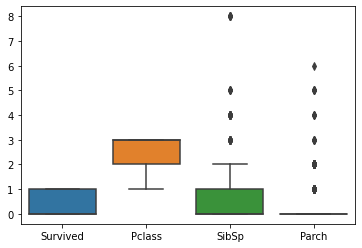

In [25]:
sns.boxplot(data=new[['Survived','Pclass', 'SibSp', 'Parch']])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

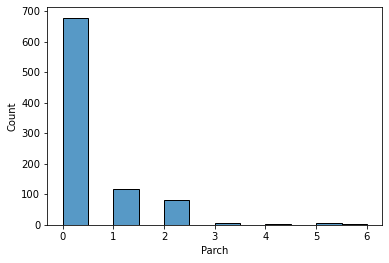

In [26]:
sns.histplot(data=new, x='Parch', binwidth=0.5)

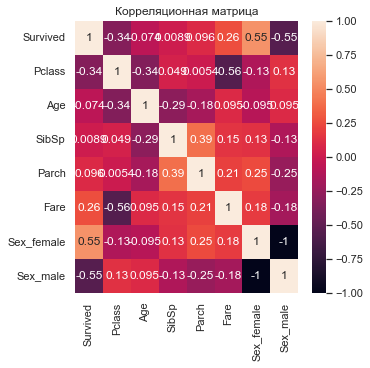

In [40]:
fig = sns.heatmap(new.corr(), annot = True).set_title('Корреляционная матрица')
sns.set(rc={'figure.figsize':(5,5)})

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new['Age'] = scaler.fit_transform(new[['Age']])
new['Fare'] = scaler.fit_transform(new[['Fare']])

In [38]:
new.drop(new[new['SibSp'] == 8].index, inplace = True) # removed SibSp outlier 8

In [42]:
new.describe()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.386878,2.303167,0.000790,0.368778,-0.005954,0.351810,0.648190
std,0.487311,0.837101,1.004457,0.796210,1.002268,0.477805,0.477805
min,0.000000,1.000000,-2.230443,0.000000,-0.648422,0.000000,0.000000
25%,0.000000,2.000000,-0.571902,0.000000,-0.489442,0.000000,0.000000
50%,0.000000,3.000000,-0.033914,0.000000,-0.357391,0.000000,1.000000
75%,1.000000,3.000000,0.427219,0.000000,-0.034314,1.000000,1.000000
max,1.000000,3.000000,3.885714,6.000000,9.667167,1.000000,1.000000


In [41]:
del new['SibSp'] #as correlated with Parch

In [54]:
X_n = new[['Pclass','Age','Parch','Fare','Sex_female','Sex_male']]
y_n = new[['Survived']]

In [55]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.3, random_state=42)

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_n, y_train_n)

C:\Users\spassiri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [57]:
log.score(X_train_n, y_train_n)

0.7864077669902912

In [58]:
log.score(X_test_n, y_test_n)

0.8195488721804511

### Conclusions
* Removed variables with no logic relations to target variable
* Categorial variable 'Sex' encoded to column
* removed outliers in Sibsp (but potentially we can keep these rows as we deleted this column)
* removed correlated variables between themselves Sibsp
* After data cleaning and transformation we got better result of modeling. So it is critical to prepare data to improve model quality. Filling the gaps in really big data  also make sense as a preprocessing.